In [1]:
from wtpy import WtBtEngine,EngineType
from Strategies.DualThrust import StraDualThrust

In [3]:
#创建一个运行环境，并加入策略
engine = WtBtEngine(EngineType.ET_CTA)
engine.init('../common/', "configbt.yaml")
engine.configBacktest(201909100930,201912011500)
engine.configBTStorage(mode="csv", path="../storage/")
engine.commitBTConfig()

In [4]:
'''
创建DualThrust策略的一个实例
name    策略实例名称
code    回测使用的合约代码
barCnt  要拉取的K线条数
period  要使用的K线周期，m表示分钟线
days    策略算法参数，算法引用的历史数据条数
k1      策略算法参数，上边界系数
k2      策略算法参数，下边界系数
isForStk    DualThrust策略用于控制交易品种的代码
'''
straInfo = StraDualThrust(name='pydt_IF', code="CFFEX.IF.HOT", barCnt=50, period="m5", days=30, k1=0.1, k2=0.1, isForStk=False)
engine.set_cta_strategy(straInfo)

In [5]:
#开始运行回测
engine.run_backtest(bAsync=False)

In [6]:
def analyze_with_pyfolio(fund_filename:str, capital:float=500000):
    import pyfolio as pf
    import pandas as pd
    from datetime import datetime
    import matplotlib.pyplot as plt

    # 读取每日资金
    df = pd.read_csv(fund_filename)
    df['date'] = df['date'].apply(lambda x : datetime.strptime(str(x), '%Y%m%d'))
    df = df.set_index(df["date"])

    # 将资金转换成收益率
    ay = df['dynbalance'] + capital
    rets = ay.pct_change().fillna(0).tz_localize('UTC')

    # 调用pyfolio进行分析
    pf.create_full_tear_sheet(rets)

    # 如果在jupyter，不需要执行该语句
    plt.show()

E:\github\wtpy\demos\cta_fut_bt\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Start date,2019-09-10
End date,2019-10-31
Total months,1
,Backtest
Annual return,-93.2%
Cumulative returns,-28.9%
Annual volatility,32.5%
Sharpe ratio,-8.06
Calmar ratio,-3.19
Stability,0.89
Max drawdown,-29.2%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,29.24,2019-09-10,2019-10-30,NaT,NaN
1,0.00,2019-09-10,2019-09-10,2019-09-10,1
2,0.00,2019-09-10,2019-09-10,2019-09-10,1
3,0.00,2019-09-10,2019-09-10,2019-09-10,1
4,0.00,2019-09-10,2019-09-10,2019-09-10,1


E:\github\wtpy\demos\cta_fut_bt\pyfolio\timeseries.py:1253: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  period = returns_dupe.loc[start:end]


Stress Events,mean,min,max
New Normal,-1.04%,-4.51%,4.50%


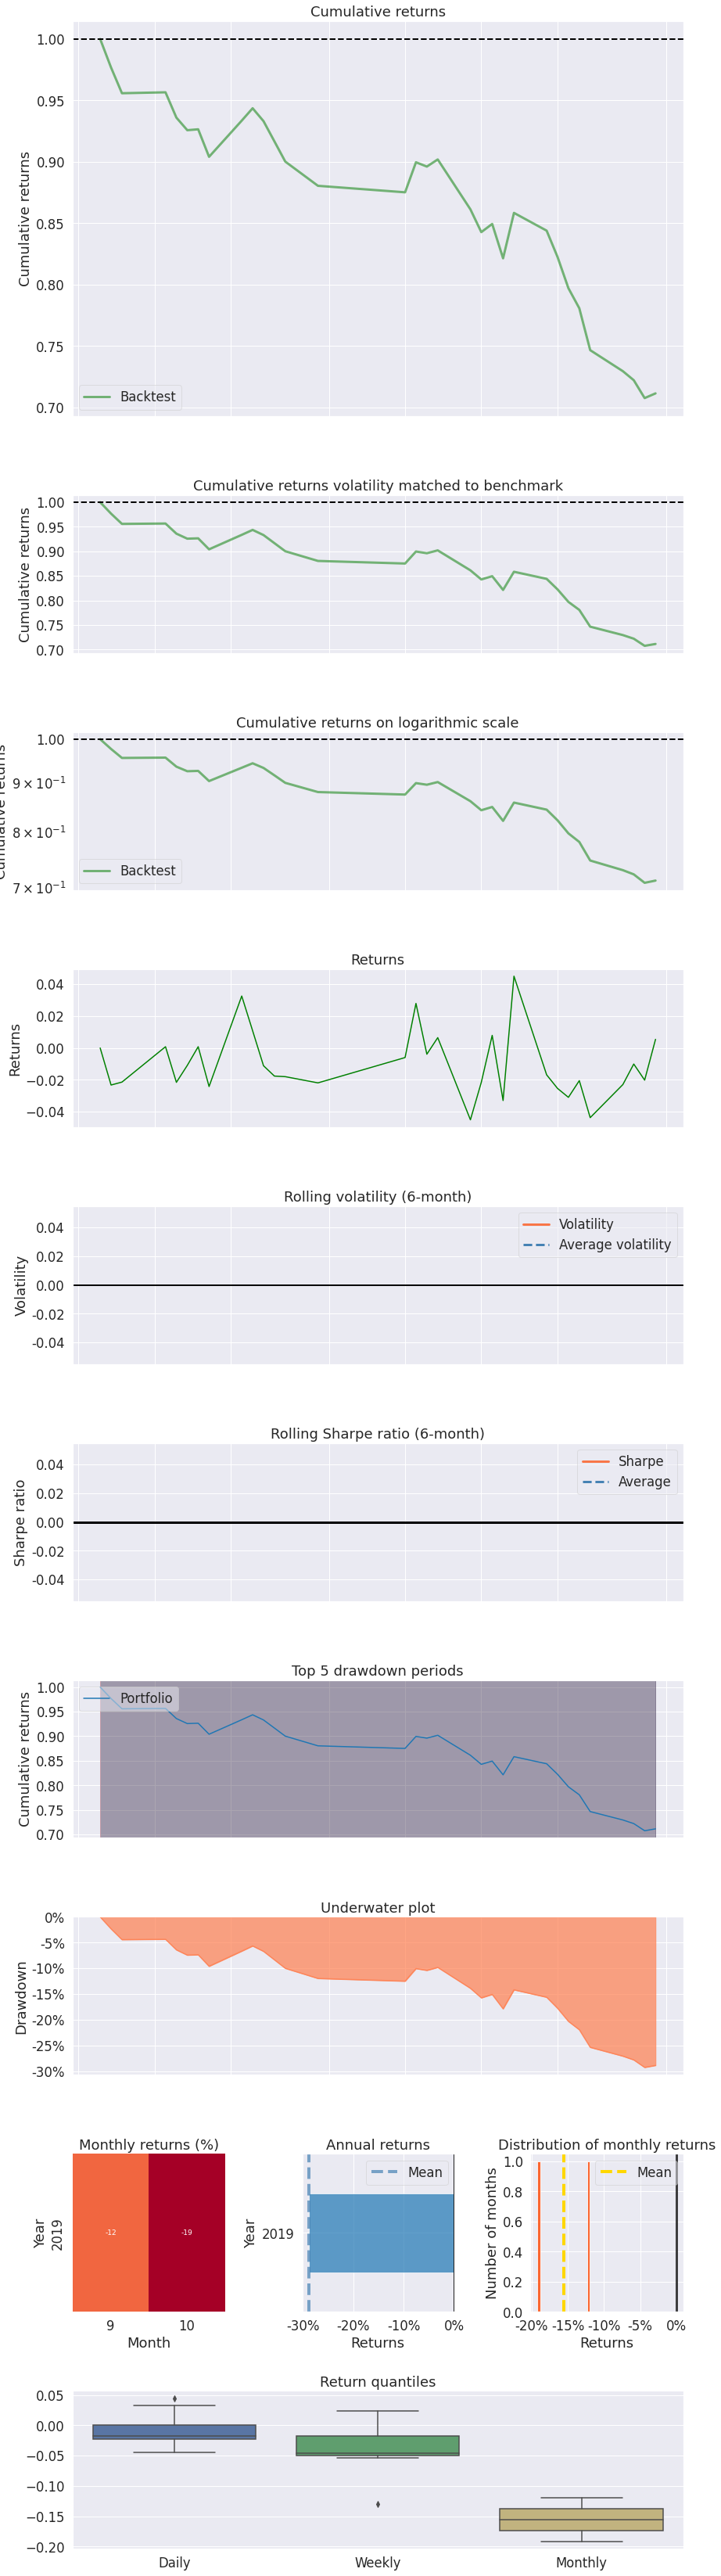

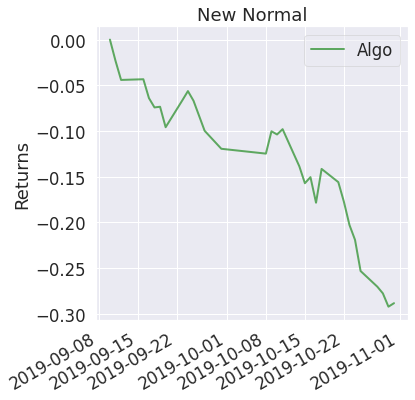

In [7]:
analyze_with_pyfolio("./outputs_bt/pydt_IF/funds.csv",500000)

In [8]:
engine.release_backtest()